# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax


# Loading Data

In [3]:
data = pd.read_csv('Linear Regression - Sheet1.csv')

In [4]:
data.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


In [5]:
data

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
...,...,...
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889


In [6]:
data.isnull().sum()

X    0
Y    0
dtype: int64

# Splitting the train and test set

In [7]:
np.array(data.X[:500]).shape

(300,)

In [8]:
train_input = np.array(data.X[:200]).reshape(200, 1)
train_output = np.array(data.Y[:200]).reshape(200, 1)

validation_input = np.array(data.X[200:250]).reshape(50, 1)
validation_output = np.array(data.Y[200:250]).reshape(50, 1)

In [9]:
print(train_output)

[[  3.88888889]
 [  4.55555556]
 [  5.22222222]
 [  5.88888889]
 [  6.55555556]
 [  7.22222222]
 [  7.88888889]
 [  8.55555556]
 [  9.22222222]
 [  9.88888889]
 [ 10.55555556]
 [ 11.22222222]
 [ 11.88888889]
 [ 12.55555556]
 [ 13.22222222]
 [ 13.88888889]
 [ 14.55555556]
 [ 15.22222222]
 [ 15.88888889]
 [ 16.55555556]
 [ 17.22222222]
 [ 17.88888889]
 [ 18.55555556]
 [ 19.22222222]
 [ 19.88888889]
 [ 20.55555556]
 [ 21.22222222]
 [ 21.88888889]
 [ 22.55555556]
 [ 23.22222222]
 [ 23.88888889]
 [ 24.55555556]
 [ 25.22222222]
 [ 25.88888889]
 [ 26.55555556]
 [ 27.22222222]
 [ 27.88888889]
 [ 28.55555556]
 [ 29.22222222]
 [ 29.88888889]
 [ 30.55555556]
 [ 31.22222222]
 [ 31.88888889]
 [ 32.55555556]
 [ 33.22222222]
 [ 33.88888889]
 [ 34.55555556]
 [ 35.22222222]
 [ 35.88888889]
 [ 36.55555556]
 [ 37.22222222]
 [ 37.88888889]
 [ 38.55555556]
 [ 39.22222222]
 [ 39.88888889]
 [ 40.55555556]
 [ 41.22222222]
 [ 41.88888889]
 [ 42.55555556]
 [ 43.22222222]
 [ 43.88888889]
 [ 44.55555556]
 [ 45.22

In [10]:
train_input

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

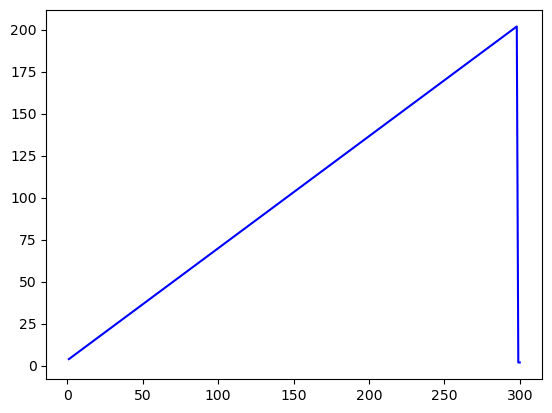

In [11]:
plt.plot(data.X, data.Y, color='blue')
plt.show()

In [12]:
data.Y[290:]

290    197.222222
291    197.888889
292    198.555556
293    199.222222
294    199.888889
295    200.555556
296    201.222222
297    201.888889
298      1.888889
299      1.888889
Name: Y, dtype: float64

<font color='green' size='5px'>Linear Regression</font>

## Forward Propagation

f(x) = m*x + c

In [13]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    
    predictions = np.multiply(m, train_input) + c
    
    return predictions

## Cost Function

summation(1/2n * (y-f(x))**2)

In [14]:
def cost_function(train_output, predictions):
    cost = np.mean((train_output-predictions)**2)*0.5
    return cost

## Gradient Descent

df = (f(x)-y)
<br>
dm = (f(x)-y)*x/n
<br>
dc = (f(x)-y)/n

In [15]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = predictions-train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)
    
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    
    return derivatives

## Update Parameters

new_m = m - learning_rate * dm
<br>
new_c = c - learning_rate * dc

In [16]:
def update_parameters(parameters, learning_rate, derivatives):
    parameters['m'] = parameters['m'] - learning_rate *derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    
    return parameters

# Model Training

In [17]:
def train(train_input, train_output, learning_rate, iters):
    parameters = dict()
    
    plt.figure()
    
    loss = list()
    
    parameters['m'] = np.random.uniform(0, 1)
    parameters['c'] = np.random.uniform(0, 1)
    
    for i in range(iters):
        
        predictions = forward_propagation(train_input, parameters)
        
        cost = cost_function(train_input, predictions)
        
        loss.append(cost)
        print(f"Iteration = {i+1}, Loss = {cost} ")
        
        fig, ax = plt.subplots()
        ax.plot(train_input, train_output, "+", label="Original")
        ax.plot(train_input, predictions, "*", label="Training")
        
        legend = ax.legend()
        
        plt.plot(train_input, train_output, "+", label="Original")
        plt.plot(train_input, predictions, "*", label="Training")
        plt.show()
        
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        parameters = update_parameters(parameters, learning_rate, derivatives)
        
        print()
    return parameters, loss

## Training

Iteration = 1, Loss = 5090.207028755432 


<Figure size 640x480 with 0 Axes>

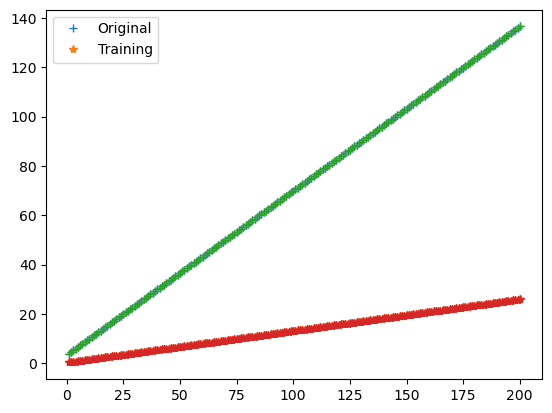


Iteration = 2, Loss = 4246.550256271361 


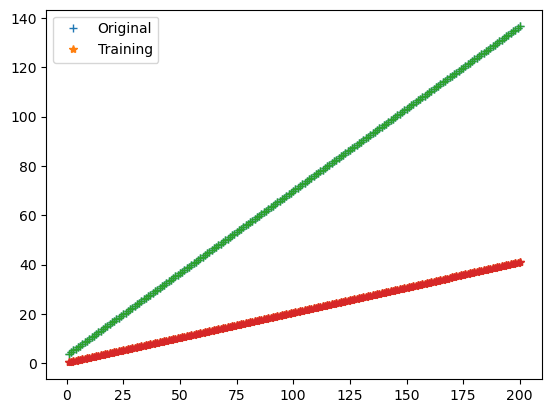


Iteration = 3, Loss = 3577.9165210262768 


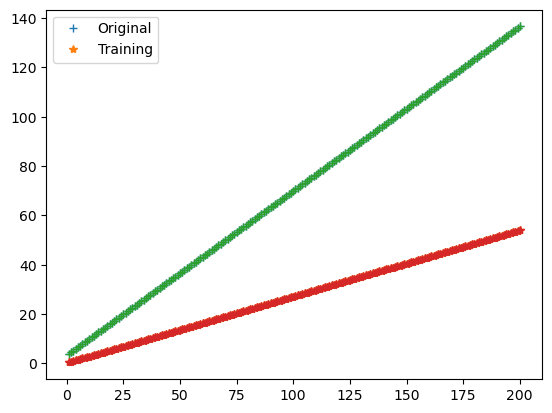


Iteration = 4, Loss = 3045.332471527802 


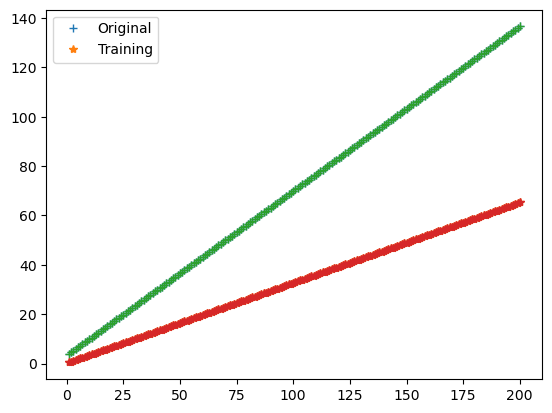


Iteration = 5, Loss = 2618.9354636029293 


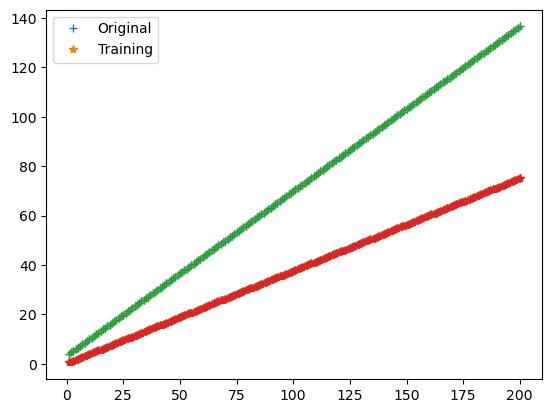


Iteration = 6, Loss = 2275.778403934824 


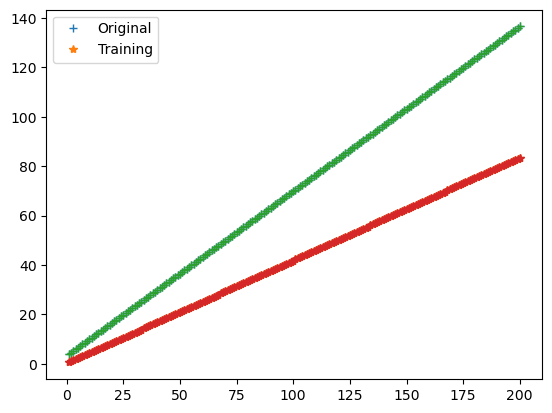


Iteration = 7, Loss = 1998.172915498332 


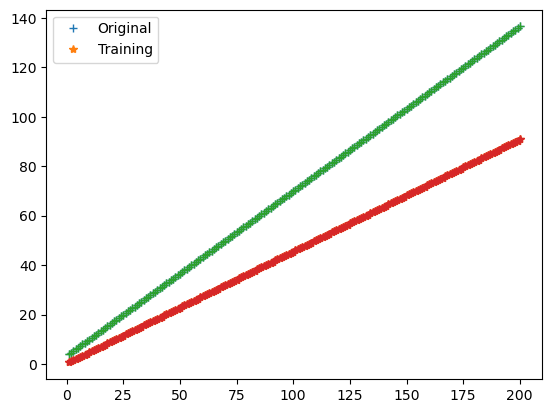


Iteration = 8, Loss = 1772.4374955233607 


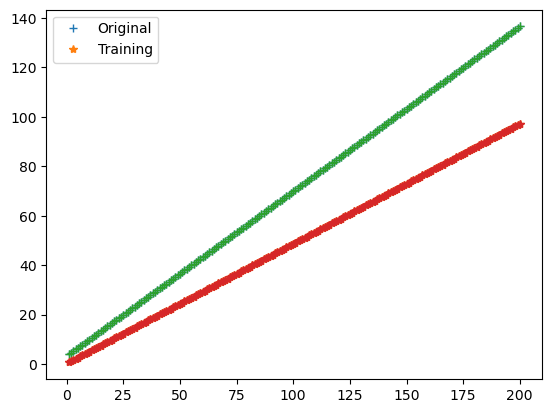


Iteration = 9, Loss = 1587.9505397525331 


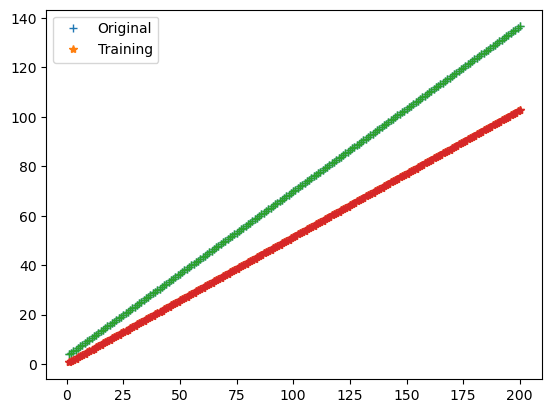


Iteration = 10, Loss = 1436.4330167276594 


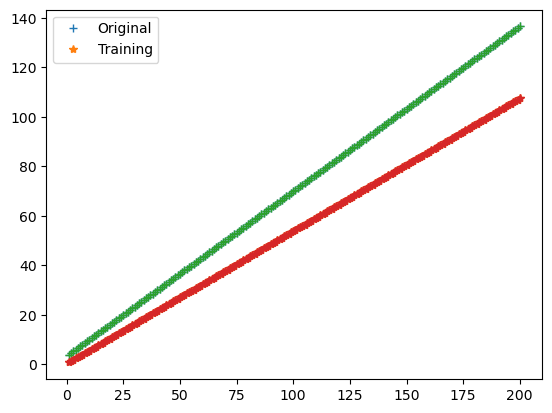


Iteration = 11, Loss = 1311.4042673497968 


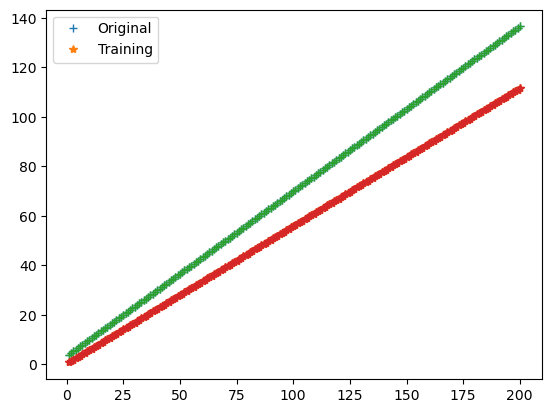


Iteration = 12, Loss = 1207.7684332405413 


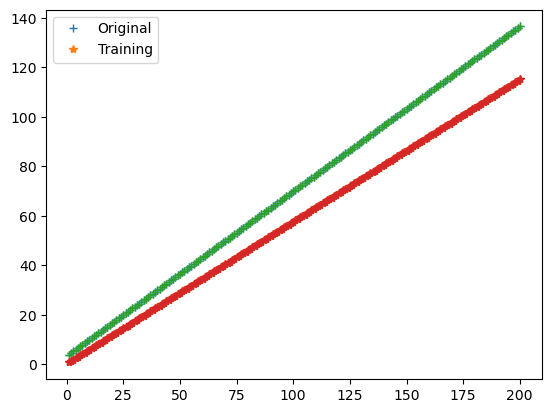


Iteration = 13, Loss = 1121.4995483693667 


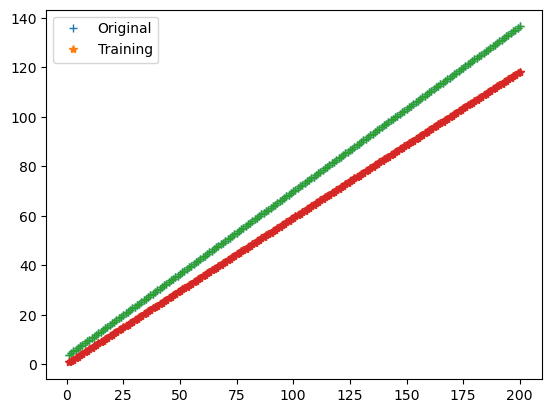


Iteration = 14, Loss = 1049.4012360607103 


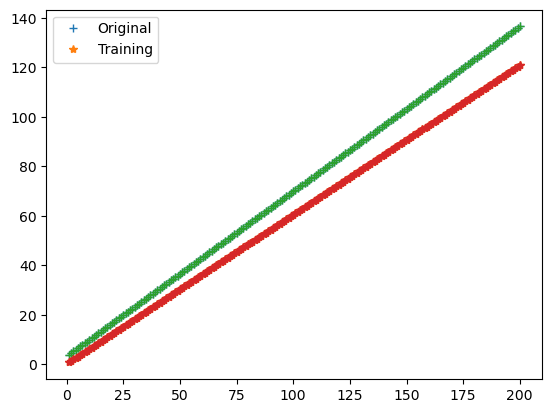


Iteration = 15, Loss = 988.922893178222 


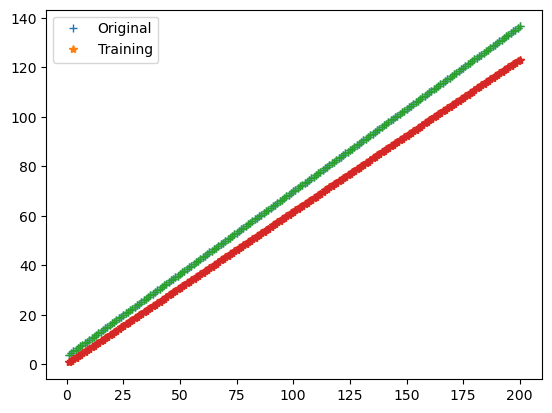


Iteration = 16, Loss = 938.018706368404 


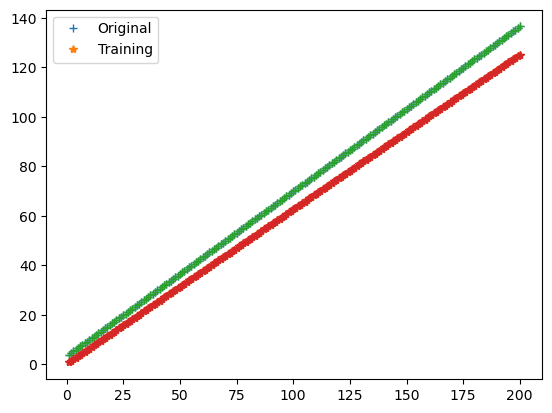


Iteration = 17, Loss = 895.039200195935 


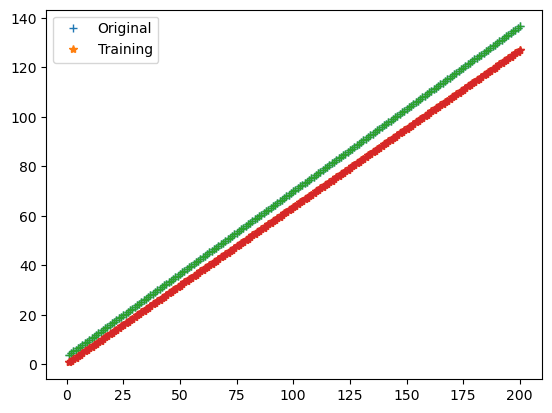


Iteration = 18, Loss = 858.6475401500524 


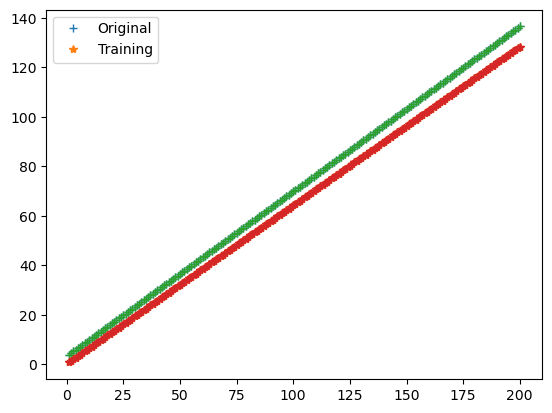


Iteration = 19, Loss = 827.7547121074413 


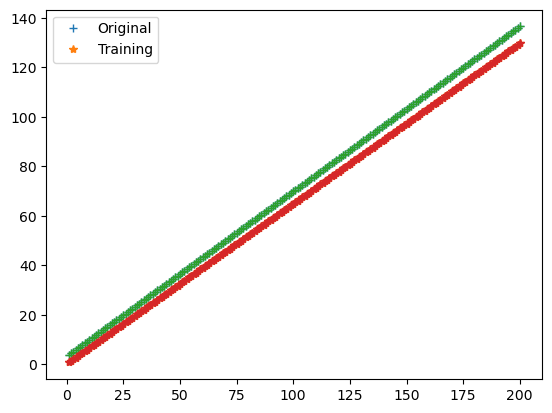


Iteration = 20, Loss = 801.4691293802206 


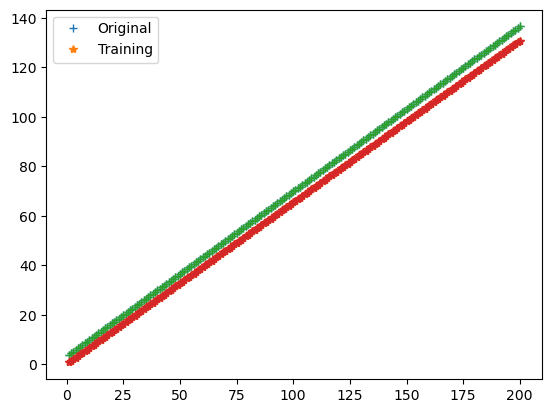


Iteration = 21, Loss = 779.0572956092084 


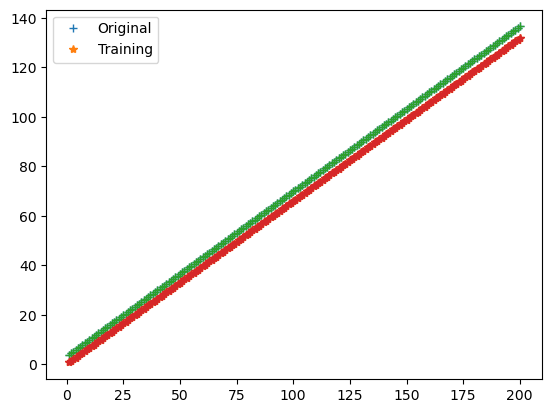


Iteration = 22, Loss = 759.9129640193854 


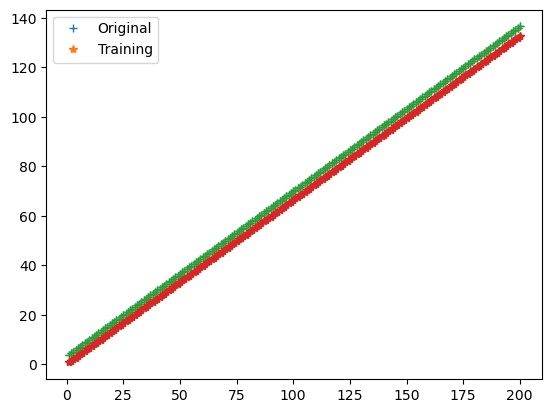


Iteration = 23, Loss = 743.5328466395446 


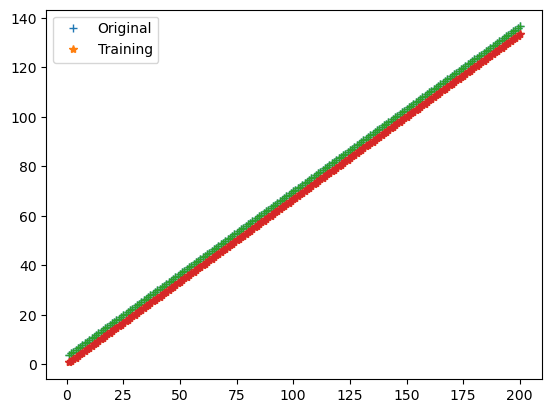


Iteration = 24, Loss = 729.4973903288301 


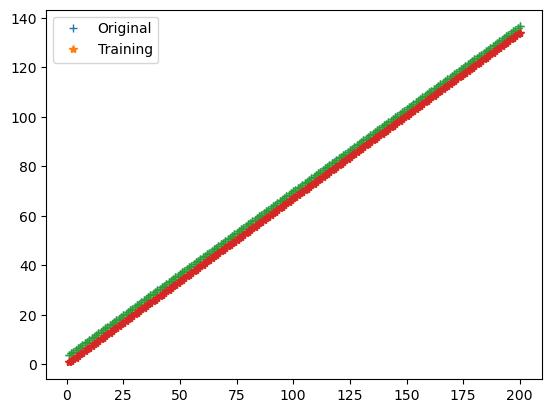


Iteration = 25, Loss = 717.4554868929196 


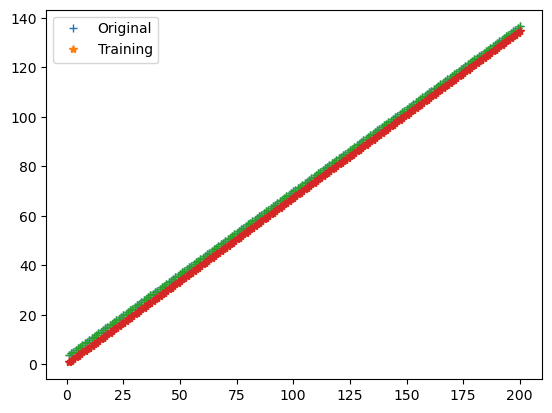


Iteration = 26, Loss = 707.1122500401169 


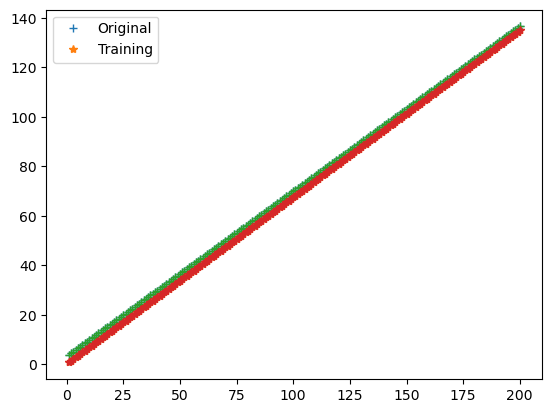


Iteration = 27, Loss = 698.2191933354985 


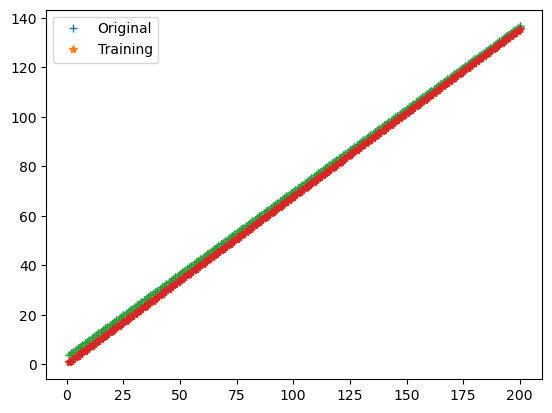


Iteration = 28, Loss = 690.5662963825719 


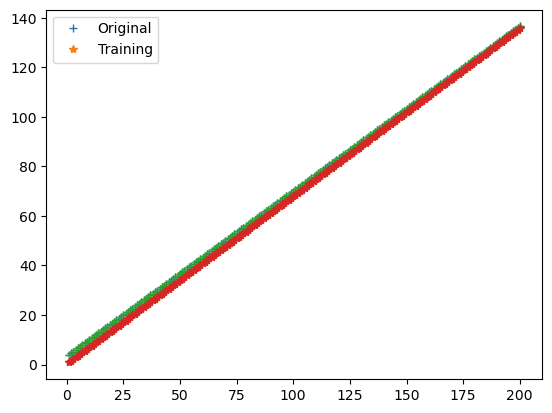


Iteration = 29, Loss = 683.975563023584 


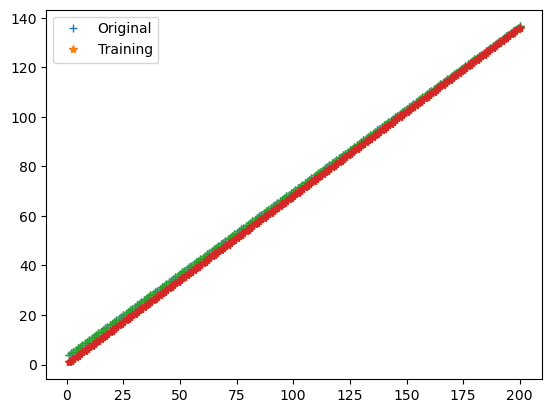


Iteration = 30, Loss = 678.2957643030351 


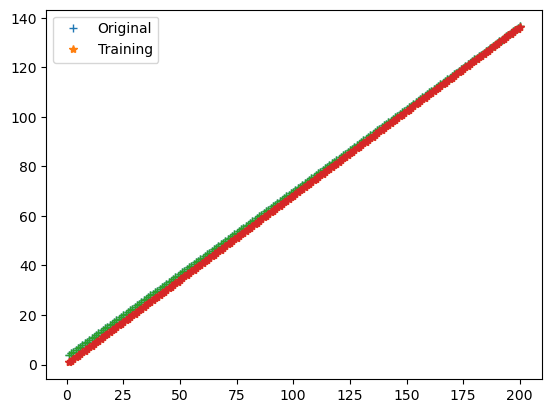

In [18]:
parameters, loss = train(train_input, train_output, 0.00001, 30)

In [19]:
print(parameters)

{'m': 0.6823202225777669, 'c': 0.13997767995486798}


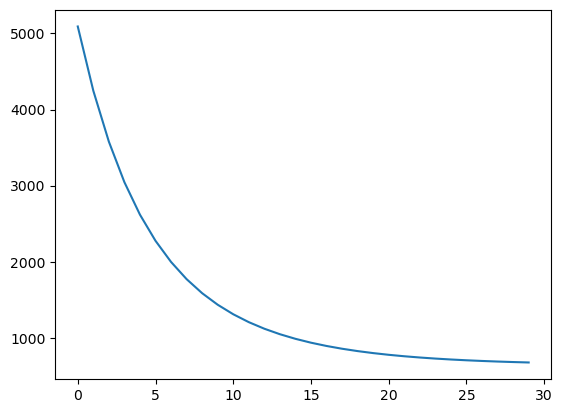

In [20]:
plt.plot(loss)

In [21]:
loss

[5090.207028755432,
 4246.550256271361,
 3577.9165210262768,
 3045.332471527802,
 2618.9354636029293,
 2275.778403934824,
 1998.172915498332,
 1772.4374955233607,
 1587.9505397525331,
 1436.4330167276594,
 1311.4042673497968,
 1207.7684332405413,
 1121.4995483693667,
 1049.4012360607103,
 988.922893178222,
 938.018706368404,
 895.039200195935,
 858.6475401500524,
 827.7547121074413,
 801.4691293802206,
 779.0572956092084,
 759.9129640193854,
 743.5328466395446,
 729.4973903288301,
 717.4554868929196,
 707.1122500401169,
 698.2191933354985,
 690.5662963825719,
 683.975563023584,
 678.2957643030351]

## prediction

In [22]:
test_predictions = validation_input*parameters['m'] + parameters['c']

In [23]:
test_predictions.shape
validation_output.shape

(50, 1)

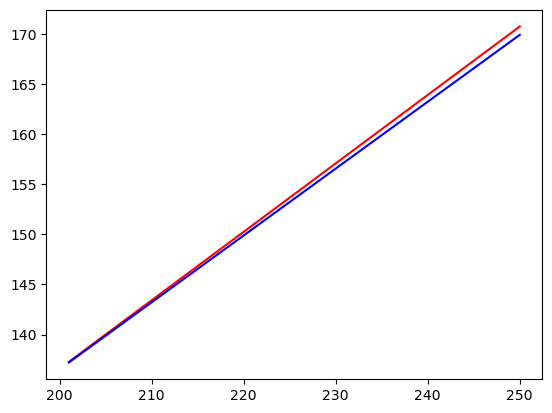

In [24]:
plt.plot(validation_input, test_predictions, color='red')
plt.plot(validation_input, validation_output, color='blue')
plt.show()

### Cost of prediction

In [25]:
cost_function(validation_output, test_predictions)

0.12570148600255046

In [26]:
print(f"Validation output shape: {validation_output.shape}")
print(f"Test predictions shape: {test_predictions.shape}")

Validation output shape: (50, 1)
Test predictions shape: (50, 1)


# Using Scikit-learn

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr_model = LinearRegression()

In [29]:
lr_model.fit(train_input, train_output)

LinearRegression()

In [30]:
lr_model.coef_

array([[0.66666667]])

In [31]:
lr_model.intercept_

array([3.22222222])

## Prediction

In [32]:
test_predictions_lr = lr_model.predict(validation_input)

In [33]:
test_predictions_lr

array([[137.22222223],
       [137.8888889 ],
       [138.55555557],
       [139.22222223],
       [139.8888889 ],
       [140.55555557],
       [141.22222223],
       [141.8888889 ],
       [142.55555557],
       [143.22222223],
       [143.8888889 ],
       [144.55555557],
       [145.22222223],
       [145.8888889 ],
       [146.55555557],
       [147.22222223],
       [147.8888889 ],
       [148.55555557],
       [149.22222223],
       [149.8888889 ],
       [150.55555557],
       [151.22222223],
       [151.8888889 ],
       [152.55555557],
       [153.22222223],
       [153.8888889 ],
       [154.55555557],
       [155.22222223],
       [155.8888889 ],
       [156.55555557],
       [157.22222223],
       [157.8888889 ],
       [158.55555557],
       [159.22222223],
       [159.8888889 ],
       [160.55555557],
       [161.22222224],
       [161.8888889 ],
       [162.55555557],
       [163.22222224],
       [163.8888889 ],
       [164.55555557],
       [165.22222224],
       [165

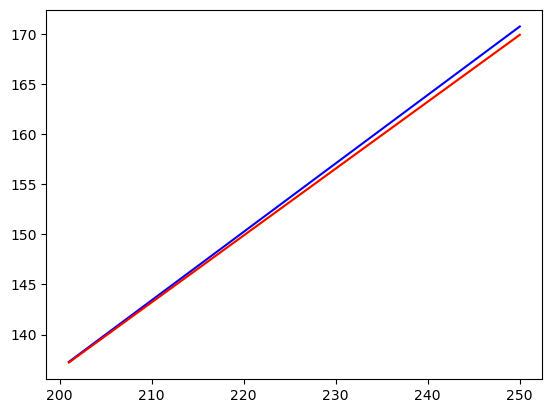

In [34]:
plt.plot(validation_input, validation_output, color='yellow')
plt.plot(validation_input, test_predictions, color='blue')
plt.plot(validation_input, test_predictions_lr, color='red')

In [35]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(validation_output, test_predictions_lr)

In [36]:
cost

7.358198452624502e-16

# Assumptions of Linear Regression

## Homoscedasticity

In [37]:
print(validation_output.shape)
print(test_predictions_lr.shape)

(50, 1)
(50, 1)


In [38]:
residuals = test_predictions_lr-validation_output

In [39]:
residuals

array([[ 3.27413261e-08],
       [-5.26910071e-10],
       [-3.37951747e-08],
       [ 3.29365832e-08],
       [-3.31652927e-10],
       [-3.35998607e-08],
       [ 3.31318404e-08],
       [-1.36395784e-10],
       [-3.34046035e-08],
       [ 3.33270975e-08],
       [ 5.88613602e-11],
       [-3.32093464e-08],
       [ 3.35224115e-08],
       [ 2.54118504e-10],
       [-3.30140892e-08],
       [ 3.37176687e-08],
       [ 4.49375648e-10],
       [-3.28188321e-08],
       [ 3.39129258e-08],
       [ 6.44632792e-10],
       [-3.26235750e-08],
       [ 3.41081829e-08],
       [ 8.39946779e-10],
       [-3.24283178e-08],
       [ 3.43034401e-08],
       [ 1.03520392e-09],
       [-3.22330607e-08],
       [ 3.44986972e-08],
       [ 1.23046107e-09],
       [-3.20378035e-08],
       [ 3.46939544e-08],
       [ 1.42571821e-09],
       [-3.18424895e-08],
       [ 3.48892115e-08],
       [ 1.62097535e-09],
       [-3.16472324e-08],
       [ 3.50844687e-08],
       [ 1.81623250e-09],
       [-3.1